In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import Colorblind6
from bokeh.models import Title
output_notebook()

Loading BokehJS ...

In [40]:
data = pd.read_csv("../scores.txt", delimiter="~")

In [41]:
data.head()

,time,model_type,kfold,avg_roc_auc,toxic_auc,s_toxic_auc,obscene_auc,threat_auc,insult_auc,i_hate_auc,notes
0,1520324601,logistic regression,10,0.978059,0.966836,0.985466,0.984330,0.982547,0.974874,0.974303,"first model: logistic regression, word to vec ..."
1,1520324858,logistic regression,10,0.979401,0.969767,0.985887,0.985399,0.982805,0.976469,0.976078,"first model: logistic regression, word to vec ..."
2,1520325081,logistic regression,10,0.980280,0.971312,0.986258,0.986298,0.983132,0.977718,0.976961,first model: word to vec max 25k features
3,1520325478,logistic regression,10,0.980280,0.971312,0.986259,0.986298,0.983133,0.977718,0.976961,first model: word to vec max 50k features
4,1520325960,logistic regression,10,0.980309,0.971419,0.986355,0.986620,0.982621,0.977803,0.977035,first model: word to vec max 75k features


Text(0.5,1,'Rate of Error For Each Model Evolution')

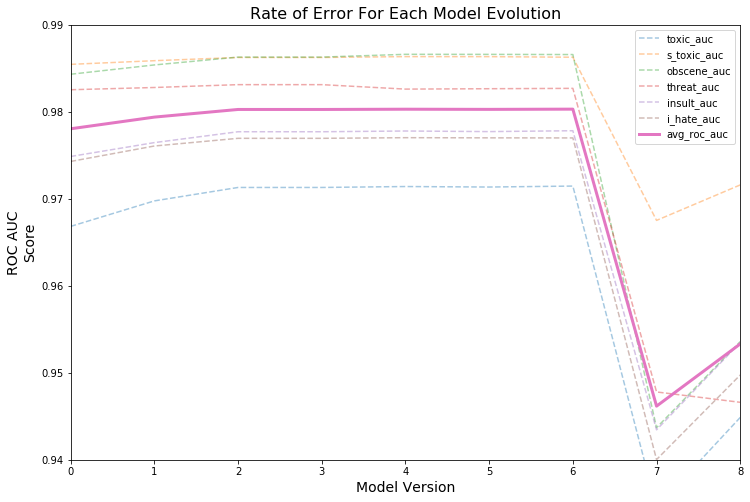

In [51]:
data = pd.read_csv("../scores.txt", delimiter="~")

fig, ax = plt.subplots(figsize=(12,8))

aucs = ["toxic_auc", "s_toxic_auc", "obscene_auc", "threat_auc", "insult_auc", "i_hate_auc"]

x = np.arange(0, len(data[aucs[0]]))

for auc in aucs:
    

    ax.plot(x, data[auc], label=auc, alpha=0.4, ls="--")
    
ax.plot(x, data["avg_roc_auc"], lw=3, label="avg_roc_auc")
ax.legend()
ax.set_xlim(0, len(data[aucs[0]])-1)
ax.set_ylim(0.94, 0.99)
ax.set_xlabel("Model Version", size=14)
ax.set_ylabel("ROC AUC\nScore", size=14)
ax.set_title("Rate of Error For Each Model Evolution", size=16)

In [47]:
# First 5 models were simply logistic regression with larger tfidfvectorizer feature sizes
# model 0: 5k, model 1: 10k, model 2: 25k, model 3: 50k, model 4: 75k, model 5: 100k
# model 6: same as models 0-5 but with 50k tfidf and lemmatization added
# model 7: Multinomial Naive Bayes, 50k tfidf, fit_priors=True
# model 8: Multinomial Naive Bayes, 50k tfidf, fit_priors=False

In [113]:
_plot = figure(x_range=(0, len(data[aucs[0]])-1), 
               y_range=(0.94, 0.99), 
               plot_height=600, 
               plot_width=800)

aucs = ["toxic_auc", "s_toxic_auc", "obscene_auc", "threat_auc", "insult_auc", "i_hate_auc"]

x = np.arange(0, len(data[aucs[0]]))

for idx, auc in enumerate(aucs):
    

    _plot.line(x, data[auc], line_color=Colorblind6[idx], line_width=3, line_alpha=0.5, legend=aucs[idx])
    

_plot.line(x, data["avg_roc_auc"], line_width=5, line_color="#334366", line_alpha=0.8, legend="Avg ROC AUC")
_plot.legend.location = "bottom_left"
_plot.add_layout(Title(text="Rate of Error for Each Model Evaluated", 
                       align="center", 
                       text_font_size='18pt'), "above")

_plot.add_layout(Title(text="Model #", align="center", text_font_size='14pt'), "below")
_plot.add_layout(Title(text="ROC AUC (Score)", 
                       align="center", 
                       text_font_size='14pt'), "left")
    
show(_plot)